In [1]:
# A notebook to interrogate the timestep data from a pe0 log.
import pandas as pd
import sys
import io
from pathlib import Path
import numpy as np

In [2]:
PE_DIR=Path('/g/data/gb02/pag548/sapphire_logs/1km_68_68/work/Flagship_ERA5to1km_1km_RAL3P2_um_fcst_000/pe_output')

In [3]:
pe0_file = PE_DIR / 'umnsa.fort6.pe0'

In [4]:
csv_start = io.StringIO()
csv_elapsed = io.StringIO()
csv_start_lines = []
csv_elapsed_lines = []

with open(pe0_file, 'r') as fp:
    for index, line in enumerate(fp):
        if 'Atm_Step: Info: Starting' in line:
            csv_start_lines.append(f'{line}')
        if 'Atm_Step: Info: timestep' in line:
            csv_elapsed_lines.append(f'{line}')

In [5]:
for line in csv_start_lines:
    csv_start.write(line)

for line in csv_elapsed_lines:
    csv_elapsed.write(line)    

In [6]:
csv_start.seek(0)
df_start = pd.read_csv(csv_start, header=None,sep='\s+')

In [7]:
df_start

,0,1,2,3,4,5,6,7,8
0,Atm_Step:,Info:,Starting,timestep,0,at,time=,166.135,seconds
1,Atm_Step:,Info:,Starting,timestep,1,at,time=,166.916,seconds
2,Atm_Step:,Info:,Starting,timestep,2,at,time=,176.902,seconds
3,Atm_Step:,Info:,Starting,timestep,3,at,time=,179.424,seconds
4,Atm_Step:,Info:,Starting,timestep,4,at,time=,181.812,seconds
...,...,...,...,...,...,...,...,...,...
356,Atm_Step:,Info:,Starting,timestep,356,at,time=,801.085,seconds
357,Atm_Step:,Info:,Starting,timestep,357,at,time=,802.511,seconds
358,Atm_Step:,Info:,Starting,timestep,358,at,time=,803.858,seconds
359,Atm_Step:,Info:,Starting,timestep,359,at,time=,805.167,seconds


In [8]:
csv_elapsed.seek(0)
df_elapsed = pd.read_csv(csv_elapsed, header=None,sep='\s+')

In [9]:
df_elapsed

,0,1,2,3,4,5,6
0,Atm_Step:,Info:,timestep,1,took,9.985,seconds
1,Atm_Step:,Info:,timestep,2,took,2.521,seconds
2,Atm_Step:,Info:,timestep,3,took,2.388,seconds
3,Atm_Step:,Info:,timestep,4,took,2.133,seconds
4,Atm_Step:,Info:,timestep,5,took,1.909,seconds
...,...,...,...,...,...,...,...
355,Atm_Step:,Info:,timestep,356,took,1.425,seconds
356,Atm_Step:,Info:,timestep,357,took,1.346,seconds
357,Atm_Step:,Info:,timestep,358,took,1.309,seconds
358,Atm_Step:,Info:,timestep,359,took,1.336,seconds


In [10]:
df_elapsed.rename(columns={"5": "seconds"},inplace=True)

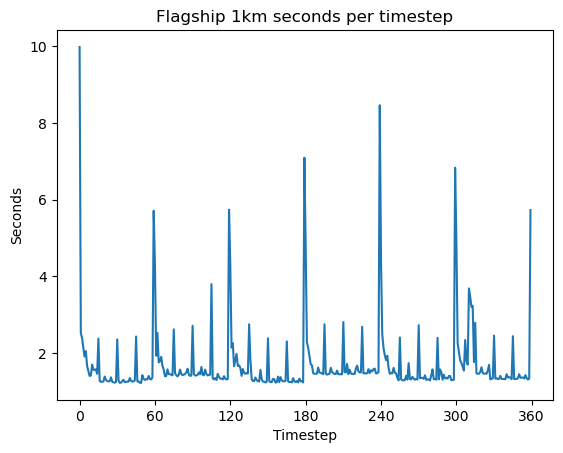

In [14]:
import matplotlib.pyplot as plt
fix,ax=plt.subplots(1,1)
df_elapsed.iloc[:,5].plot(ax=ax,xticks=np.arange(0,370,60),title="Flagship 1km seconds per timestep",xlabel='Timestep',ylabel='Seconds')
plt.savefig('Flagship_1km_Timesteps.png')

In [15]:
AUS_2200_PE_DIR=Path('/g/data/gb02/pag548/aus2200/work/20160605T0500Z/aus2200_d0198_RA3_um_fcst_000/pe_output')

In [23]:
pe0_file = AUS_2200_PE_DIR / 'umnsa.fort6.pe0'

In [24]:
csv_start = io.StringIO()
csv_elapsed = io.StringIO()
csv_start_lines = []
csv_elapsed_lines = []

with open(pe0_file, 'r') as fp:
    for index, line in enumerate(fp):
        if 'Atm_Step: Info: Starting' in line:
            csv_start_lines.append(f'{line}')
        if 'Atm_Step: Info: timestep' in line:
            csv_elapsed_lines.append(f'{line}')

In [25]:
for line in csv_start_lines:
    csv_start.write(line)

for line in csv_elapsed_lines:
    csv_elapsed.write(line)    

In [26]:
csv_start.seek(0)
df_start = pd.read_csv(csv_start, header=None,sep='\s+')

In [27]:
csv_elapsed.seek(0)
df_elapsed = pd.read_csv(csv_elapsed, header=None,sep='\s+')

In [28]:
df_elapsed.rename(columns={"5": "seconds"},inplace=True)

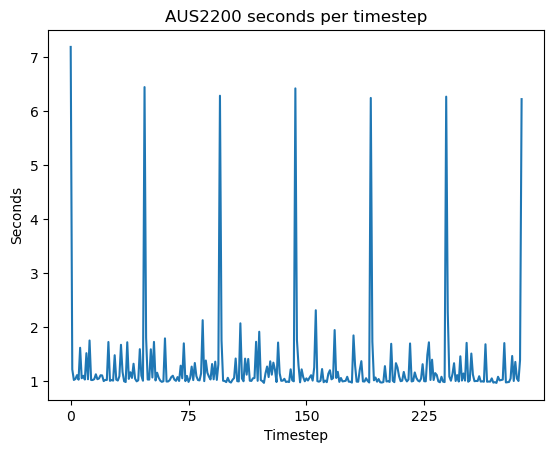

In [38]:
fix,ax=plt.subplots(1,1)
df_elapsed.iloc[:,5].plot(ax=ax,xticks=np.arange(0,300,75),title="AUS2200 seconds per timestep",xlabel='Timestep',ylabel='Seconds')
plt.savefig('AUS2200_1km_Timesteps.png')

In [30]:
df_start

,0,1,2,3,4,5,6,7,8
0,Atm_Step:,Info:,Starting,timestep,0,at,time=,39.865,seconds
1,Atm_Step:,Info:,Starting,timestep,1,at,time=,40.457,seconds
2,Atm_Step:,Info:,Starting,timestep,2,at,time=,47.645,seconds
3,Atm_Step:,Info:,Starting,timestep,3,at,time=,48.862,seconds
4,Atm_Step:,Info:,Starting,timestep,4,at,time=,49.882,seconds
...,...,...,...,...,...,...,...,...,...
284,Atm_Step:,Info:,Starting,timestep,284,at,time=,404.855,seconds
285,Atm_Step:,Info:,Starting,timestep,285,at,time=,406.209,seconds
286,Atm_Step:,Info:,Starting,timestep,286,at,time=,407.257,seconds
287,Atm_Step:,Info:,Starting,timestep,287,at,time=,408.258,seconds


In [31]:
75*3

225

In [32]:
75*4

300